<center><h1>Particle Swarm Optimization(PSO)</h1></center>

Swarm Intelligence is a branch of __Artificial Intelligence__ where we observe nature and try to learn how different biological phenomena can be imitated in a computer system to optimize the scheduling algorithms. In swarm intelligence, we focus on the collective behavior of simple organisms and their interaction with the environment.<br><br>
`PSO is a computational method that optimizes a problem by iteratively trying to improve a candidate solution with regard to a given measure of quality. It solves a problem by having a population of candidate solutions, here dubbed particles, and moving these particles around in the search-space according to simple mathematical formulae over the particle's position and velocity. Each particle's movement is influenced by its local best known position, but is also guided toward the best known positions in the search-space, which are updated as better positions are found by other particles.` This is expected to move the swarm toward the best solutions.<br><br>
__Example:__ Suppose there is a swarm (a group of birds). Now, all the birds are hungry and are searching for food. These hungry birds can be correlated with the tasks in a computation system which are hungry for resources. Now, in the locality of these birds, there is only one food particle. This food particle can be correlated with a resource. As we know, tasks are many, resources are limited. So this has become a similar condition as in a certain computation environment. Now, the birds don’t know where the food particle is hidden or located. In such a scenario, how the algorithm to find the food particle should be designed. If every bird will try to find the food on its own, it may cause havoc and may consume a large amount of time. Thus on careful observation of this swarm, it was realized that though the birds don’t know where the food particle is located, they do know their distance from it. Thus the best approach to finding that food particle is to follow the birds which are nearest to the food particle. This behavior of birds is simulated in the computation environment and the algorithm so designed is termed as Particle Swarm Optimization Algorithm.


In [170]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
# No of particles
size=3

In [172]:
# Random intialization of position
position=np.array([[1.345,2.546],[2.065,3.608],[3.987,0.974]])

In [173]:
# Random intialization of velocity
velocity=np.array([[0.145,2.346],[0.065,0.318],[0.907,0.274]])

In [174]:
# Fitness/Objective function
def objective_fn(position):
    x=position[0]
    y=position[1]
    return (x-2)**2+(y-5)**2

In [175]:
# Intialization of constants
c1=1
c2=2

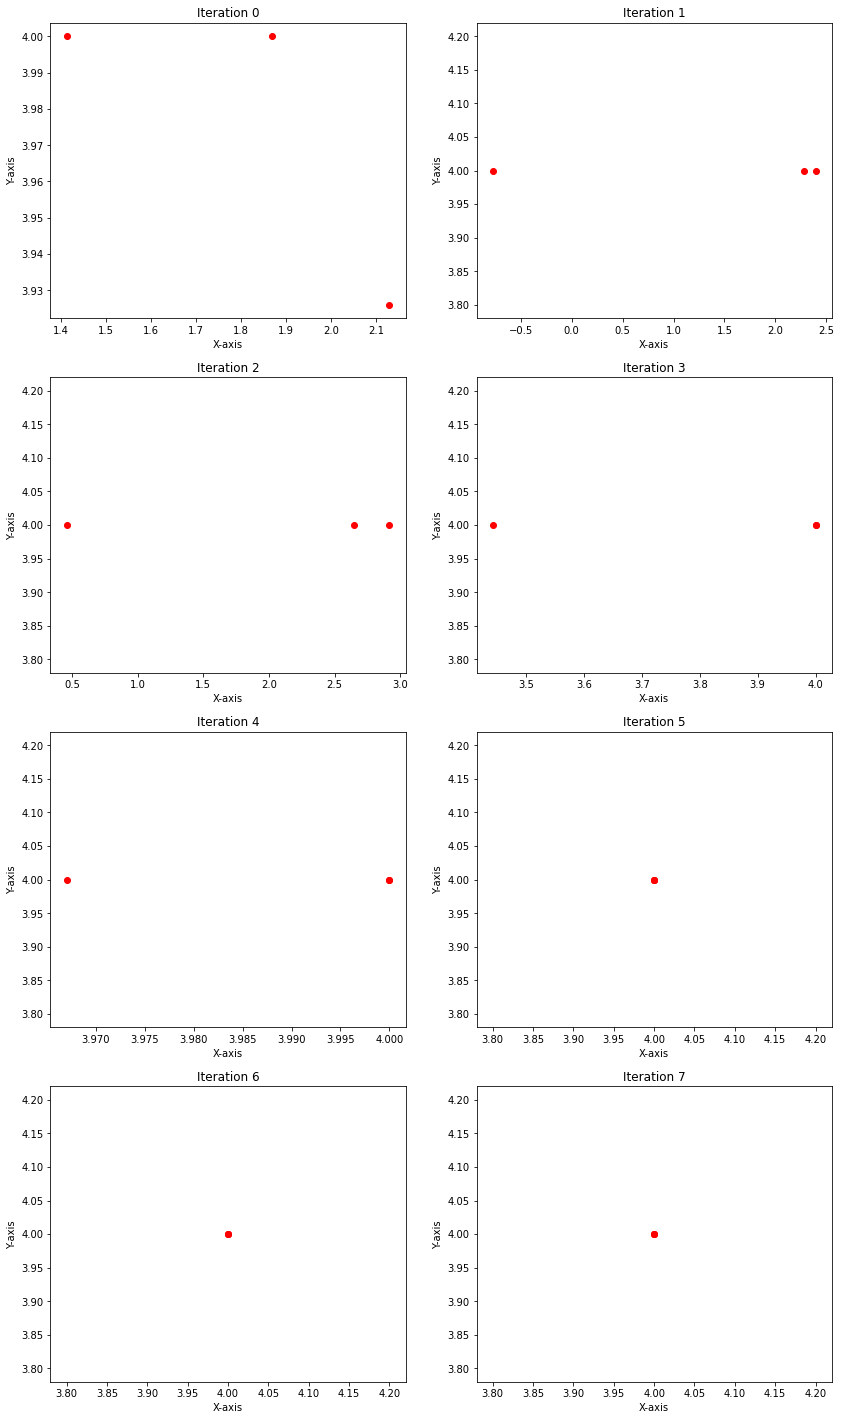

In [176]:
fig,ax=plt.subplots(4,2)
for iteration in range(4):
    for iter_offset in range(2):
        
        if iteration==0:  #initially
            pBest=position
            temp=list(map(objective_fn,position))
            gBest=np.argmin(temp)
            gBest=position[gBest]
        
        for idx in range(size):
            r1=np.random.rand(1,2)
            r2=np.random.rand(1,2)
            
            # Velocity updation
            velocity[idx]=velocity[idx]+c1*r1*(pBest[idx]-position[idx])+c2*r2*(gBest-position[idx])
            
            # Position updation
            position[idx]=position[idx]+velocity[idx]
            
            # Clipping of values outside the range
            position[idx][position[idx]>4]=4
            position[idx][position[idx]<-3]=-3
            
            # pBest & gBest updation
            if objective_fn(position[idx])<objective_fn(pBest[idx]):
                pBest[idx]=position[idx]
                if objective_fn(position[idx])<objective_fn(gBest):
                    gBest=position[idx]
            
        # Plotting i-th iteration
        ax[iteration][iter_offset].scatter(position[:,0],position[:,1],c='r')
        ax[iteration][iter_offset].set_title('Iteration {}'.format(2*iteration+iter_offset))
        ax[iteration][iter_offset].set_xlabel('X-axis')
        ax[iteration][iter_offset].set_ylabel('Y-axis')
        
fig.set_figheight(25)
fig.set_figwidth(14)